# Regresja

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Boston

In [3]:
boston = datasets.load_boston()
# print description
# print(boston.DESCR)

/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

In [4]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [5]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [6]:
X=boston_X_train
y=boston_y_train

# Zadanie
Znajdź najlepszy model dzieląc na zbiór testowy i treningowy.


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)


In [10]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+03, tolerance: 3.424e+00
  model = cd_fast.enet_coordinate_descent(
/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+03, tolerance: 3.142e+00
  model = cd_fast.enet_coordinate_descent(
/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

{'elasticnet__alpha': 0.1, 'polynomialfeatures__degree': 2}

In [ ]:
grid_1.cv_results_['mean_test_score'].reshape(4, -1)

array([[ 1.58100523e-01, -1.81557121e+02, -1.25548241e+03,
        -2.93955525e+04],
       [ 4.15342827e-01, -9.48480026e-01, -5.55987741e+02,
        -3.23053009e+05],
       [ 4.70898357e-01,  1.10322554e-01, -8.85392282e+01,
        -8.76799455e+03],
       [ 2.14286414e-01,  1.89988997e-01, -9.81903428e-01,
        -1.08753157e+03]])

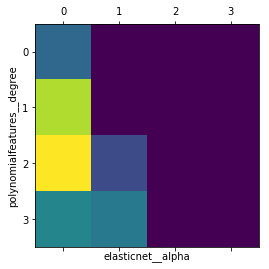

In [ ]:
plt.matshow(grid_1.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [11]:
grid_2 = model_selection.GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha = 0.1, random_state=seed)),
                param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 20], 'lasso__alpha': [0.01,0.1,1,10,100,1000,10000]}, 
                cv=kfold, 
                refit=True)
grid_2.fit(X, y)
grid_2.best_params_

/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.459e+03, tolerance: 3.424e+00
  model = cd_fast.enet_coordinate_descent(
/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+03, tolerance: 3.142e+00
  model = cd_fast.enet_coordinate_descent(
/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 2}

In [12]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7], 'ridge__alpha': [1, 10000, 0.0001]},
                    cv=kfold,
                    scoring = 'neg_mean_squared_error')

grid_3.fit(X, y)
grid_3.best_params_

/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.00143e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.00323e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.51297e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/natalia/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.88294e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


{'polynomialfeatures__degree': 2, 'ridge__alpha': 0.0001}

In [18]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True)

grid_4.fit(X, y)
grid_4.best_params_
grid_4.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [19]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: -1.2894183199282092
Explained variance score: -1.2715409278403187
Median absolute error: 3.515183060025759
Mean squared error: 43.18506882697382
Mean absolute errors: 4.829785092668599
Lasso
R^2: -1.3405620930677768
Explained variance score: -1.3336502428326416
Median absolute error: 3.6534388293894757
Mean squared error: 44.14978870532818
Mean absolute errors: 4.883117498278234
Ridge
R^2: -3.0724408027173613
Explained variance score: -2.742058115264654
Median absolute error: 2.6775419507388847
Mean squared error: 76.81804361757732
Mean absolute errors: 5.377858599017762
LR
R^2: -3.841594041936906
Explained variance score: -2.783637136362273
Median absolute error: 3.3125733971595768
Mean squared error: 91.32650425365168
Mean absolute errors: 6.162484204292298


In [21]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet', 'Lasso','Ridge','LR'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,-1.289418,-1.271541,3.515183,43.185069,4.829785
1,Lasso,-1.340562,-1.333650,3.653439,44.149789,4.883117
2,Ridge,-3.072441,-2.742058,2.677542,76.818044,5.377859
3,LR,-3.841594,-2.783637,3.312573,91.326504,6.162484
